In [43]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [64]:
LE = 16 #интервал энергии
Emin = 0.001
E = Emin
Emax = Emin + LE
L = 6 #1*math.pi 
a, b = -L/2, L/2
dx = 0.001 #*math.pi
N = round(L/dx)
dE = 0.001
NE = round(LE/dE)
e = 0.000001

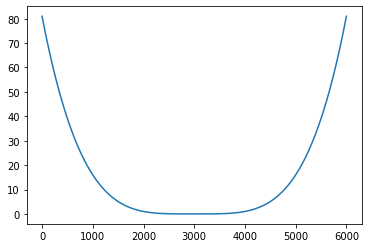

In [65]:
def V(x):
    return x**4
#V(1.1)
plt.plot([V(x) for x in np.linspace(a, b, N)])
plt.show()

In [66]:
#x = np.linspace(a, b, N)

$k^2=\frac{2mE}{\hbar^2}$;

$k=\sqrt{(2E)}$ при $m = 0.5$, $\hbar = 1$ 

In [67]:
def f(x,q):
    k = math.sqrt(E)
    return k - (V(x)/k)*(math.sin(q))**2

## Поиск уровней энергии

In [68]:
E0 = Emin
dx0 = 0.1
n0 = round(L/dx0)
l = 1
E = E0
En1 = []
En2 = []
t = []
for j in range(1, NE+1):
    q = 0
    x = a
    for i in range(1, n0+1):
        p1 = f(x,q)
        p2 = f(x + dx0/2, q + dx0/2*p1)
        p3 = f(x + dx0/2, q + dx0/2*p2)
        p4 = f(x + dx0, q + dx0*p3)
        q = q + dx0/6*(p1 + 2*p2 + 2*p3 + p4)
        x = a + i*dx0
    E = E0 + dE*j
    if (l*math.pi<=q<=(l+1)*math.pi and len(En1)<l):
        if(Emin<=E<=Emax):
            En1.append(E-3*dE)
            En2.append(E+3*dE)
            t.append(l-1)
        l = l + 1
    

In [69]:
En1
#En2


[1.059, 3.798, 7.454000000000001, 11.642999999999999]

In [70]:
E = Emin
En = []
def fun(E, w): # w - iterator
    q = 0
    x = a
    for i in range(1, N+1):
        def f1(x,q):
            return math.sqrt(E) - (V(x)/math.sqrt(E))*(math.sin(q))**2
        p1 = f1(x,q)
        p2 = f1(x + dx/2, q + dx/2*p1)
        p3 = f1(x + dx/2, q + dx/2*p2)
        p4 = f1(x + dx, q + dx*p3)
        q = q + (dx/6)*(p1 + 2*p2 + 2*p3 + p4)
        x = a + i*dx
    return q - w*math.pi
for w in range(1,len(En1)+1):
    Ea = En1[w-1]
    Eb = En2[w-1]
    Ec = (Ea + Eb)/2
    while (abs(fun(Ea, w))>e):
        Ec = (Ea + Eb)/2
        if (fun(Ea, w)*fun(Ec, w) < 0):
            Eb = Ec
        else:
            if(fun(Ec, w) == 0):
                break
            else:
                Ea = Ec
    En.append(Ec)

In [71]:
En

[1.060362139972625, 3.799673574775457, 7.455702145040036, 11.644771457657221]

## Волновые функции

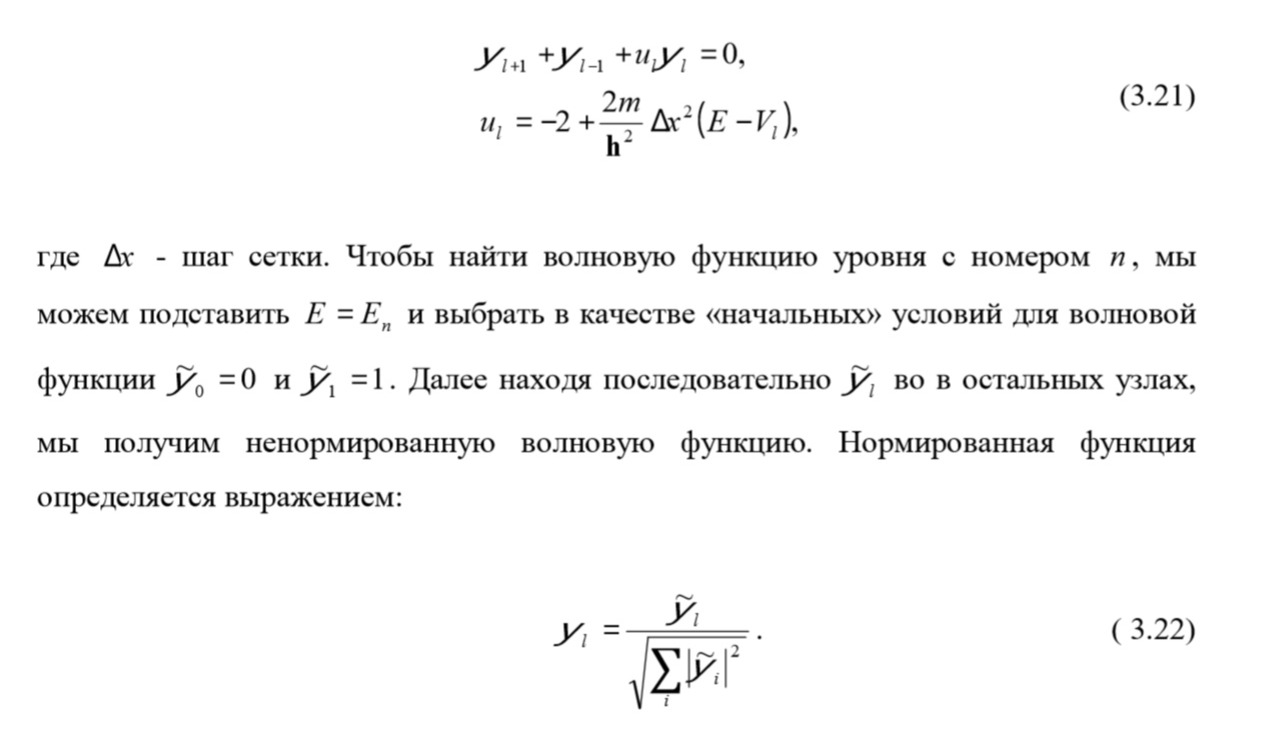

In [72]:
dxx = 0.001
z = round(L/dxx)
list_of_ph = []
for j in range(len(En)):
    z0, z1 = 0, 1
    ph = [z0, z1]
    for i in range(z+1):
        x = a + i*dxx
        v = -2 + dxx**2*(En[j] - V(x))
        wf = -z0 - v*z1
        ph.append(wf)
        z0 = z1
        z1 = wf
    pf = math.sqrt(sum([ph[j]**2 for j in range(z+1)]))
    s = 1/pf
    ph1 = [ph[k]*s for k in range(z+1)]    
    list_of_ph.append(ph1)
    

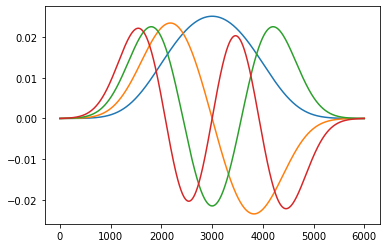

In [73]:
for i in range(len(En)):
    plt.plot(list_of_ph[i])
plt.show()

## График квадрата волновых функций

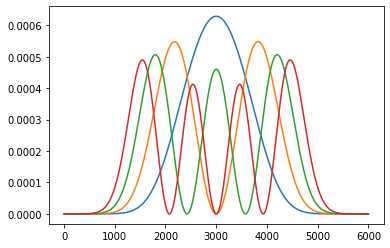

In [75]:
for i in range(len(En)):
    plt.plot([list_of_ph[i][j]**2 for j in range(z+1)])
plt.show()

In [74]:
for i in range(len(En)):
    print("phi^2_",i+1, "=")
    print (sum([list_of_ph[i][j]**2 for j in range(z+1)]))
    

phi^2_ 1 =
1.0000000000000036
phi^2_ 2 =
0.9999999999999977
phi^2_ 3 =
1.0000000000000022
phi^2_ 4 =
0.9999999999999998
